# Learning Agency Lab

# In this lesson, we will predict the scores according to the texts written and analyze the data

<a href='https://www.kaggle.com/c/learning-agency-lab-automated-essay-scoring-2/overview' target=_blank>You can find the data file here</a>

<img src=https://www.forschung-und-lehre.de/fileadmin/user_upload/Rubriken/Lehre/2018/4-18/Pruefung_mauritius-images_Charlie-Newham_Alamy_9.C48137.jpg width='400'>

In [1]:
#pip install nltk

In [2]:
import pandas as pd
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv", encoding='latin-1')

In [4]:
df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


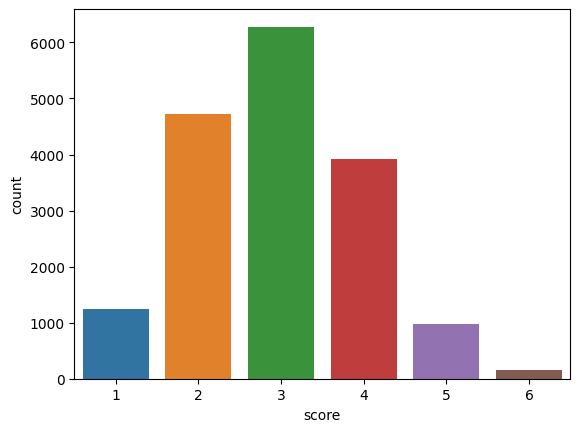

In [5]:
sns.countplot(x=df['score']);

In [6]:
d={'1':0,'2':1,'3':2,'4':3,'5':4,'6':5}

In [7]:
df['score'] = df['score'].astype(str)

In [8]:
d = {str(k):v for k,v in d.items()}

In [9]:
df['score'] = df['score'].map(d)

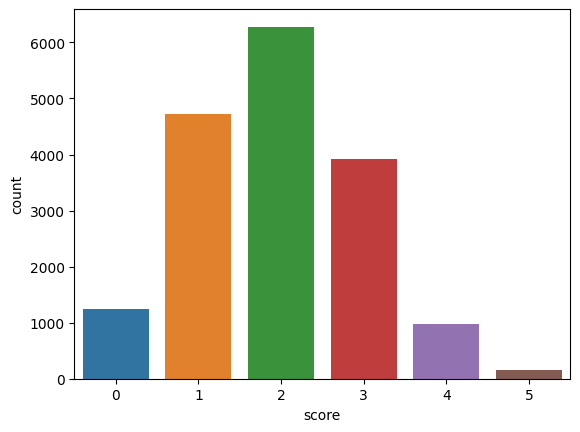

In [10]:
sns.countplot(x=df['score']);

In [11]:
df.isnull().sum()

essay_id     0
full_text    0
score        0
dtype: int64

In [12]:
df.shape

(17307, 3)

In [13]:
df['full_text']=df['full_text'].str.lower()
df['full_text']=df['full_text'].str.replace('[^\w\s]','',regex= True)
df['full_text']=df['full_text'].str.replace('\n','')
df['full_text']=df['full_text'].str.replace('\d+','', regex = True)
df['full_text']=df['full_text'].str.replace('\r','', regex = True)

In [14]:
df['full_text']

0        many people have car where they live the thing...
1        i am a scientist at nasa that is discussing th...
2        people always wish they had the same technolog...
3        we all heard about venus the planet without al...
4        dear state senatorthis is a letter to argue in...
                               ...                        
17302    the story  the challenge of exploing venus  is...
17303    technology has changed a lot of ways that we l...
17304    if you dont like sitting around all day than i...
17305    in the challenge of exporing venus the author ...
17306    venus is worthy place to study but dangerous t...
Name: full_text, Length: 17307, dtype: object

In [15]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [16]:
x=df['full_text']
y=df['score']

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [19]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [20]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,6),analyzer=lemmafn)

In [21]:
x=vect.fit_transform(x)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

2024-05-20 13:42:05.027109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 13:42:05.027210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 13:42:05.028868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=42)

In [24]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(18,activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, verbose=1)

Epoch 1/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 58s 112ms/step - accuracy: 0.3430 - loss: 1.6024 - val_accuracy: 0.5084 - val_loss: 1.1160
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 53s 110ms/step - accuracy: 0.5744 - loss: 1.0339 - val_accuracy: 0.5765 - val_loss: 1.0681
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.6631 - loss: 0.8519 - val_accuracy: 0.5690 - val_loss: 1.0330
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 56s 114ms/step - accuracy: 0.7055 - loss: 0.7434 - val_accuracy: 0.5661 - val_loss: 1.0752
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.7538 - loss: 0.6448 - val_accuracy: 0.5621 - val_loss: 1.1161
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.8030 - loss: 0.5272 - val_accuracy: 0.5708 - val_loss: 1.2231
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.8301 - loss: 0.4631 - val_accuracy: 0.5569 - val_loss: 1.3849
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 54s 110ms/step - accuracy: 0.8544 - loss: 0

In [26]:
loss,accuracy=model.evaluate(x_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5466 - loss: 2.2916


In [27]:
accuracy

0.5459272265434265

In [28]:
tahmin=model.predict(x_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [29]:
import matplotlib.pyplot as plt

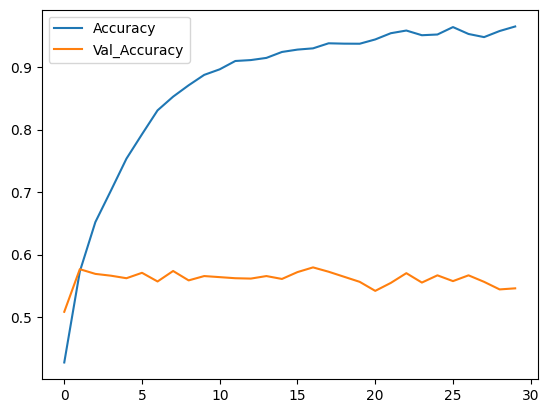

In [30]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

<Axes: >

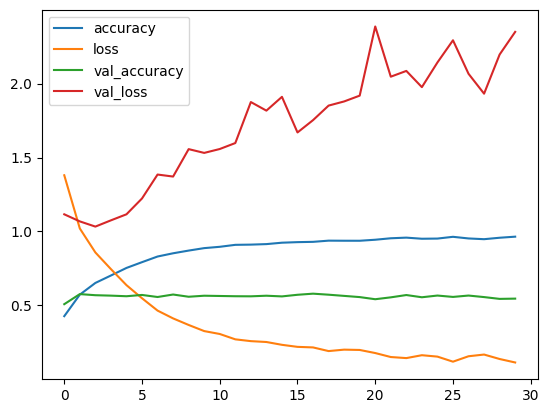

In [31]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [33]:
import numpy as np

In [34]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[ 47,  72,   9,   1,   0,   0],
       [ 17, 301, 136,   8,   0,   1],
       [ 10, 149, 394,  91,   1,   0],
       [  1,   8, 173, 183,  12,   0],
       [  0,   0,  10,  70,  20,   0],
       [  0,   0,   1,  10,   6,   0]])

In [35]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

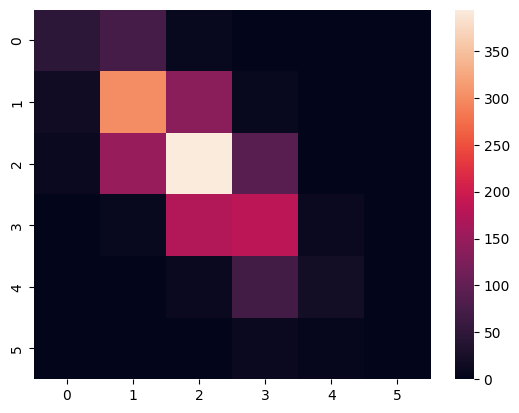

In [36]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [37]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46       129
           1       0.57      0.65      0.61       463
           2       0.54      0.61      0.58       645
           3       0.50      0.49      0.49       377
           4       0.51      0.20      0.29       100
           5       0.00      0.00      0.00        17

    accuracy                           0.55      1731
   macro avg       0.46      0.39      0.40      1731
weighted avg       0.54      0.55      0.54      1731



# We could not achieve good accuracy in this data, but using such a model to do better and give scores in lessons will be very useful for teachers

### [Click for more of my data analysis](https://github.com/salihBekdemir)